# Eland Demo Notebook

In [1]:
import eland as ed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from elasticsearch import Elasticsearch

# Import standard test settings for consistent results
from eland.conftest import *

## Compare eland DataFrame vs pandas DataFrame

Create an eland.DataFrame from a `flights` index

In [2]:
ed_flights = ed.read_es('localhost', 'flights')

In [3]:
type(ed_flights)

eland.dataframe.DataFrame

Compare to pandas DataFrame (created from the same data)

In [4]:
pd_flights = ed.eland_to_pandas(ed_flights)

In [5]:
type(pd_flights)

pandas.core.frame.DataFrame

## Attributes and underlying data

### DataFrame.columns

In [6]:
pd_flights.columns

Index(['AvgTicketPrice', 'Cancelled', 'Carrier', 'Dest', 'DestAirportID', 'DestCityName',
       'DestCountry', 'DestLocation', 'DestRegion', 'DestWeather', 'DistanceKilometers',
       'DistanceMiles', 'FlightDelay', 'FlightDelayMin', 'FlightDelayType', 'FlightNum',
       'FlightTimeHour', 'FlightTimeMin', 'Origin', 'OriginAirportID', 'OriginCityName',
       'OriginCountry', 'OriginLocation', 'OriginRegion', 'OriginWeather', 'dayOfWeek',
       'timestamp'],
      dtype='object')

In [7]:
ed_flights.columns

Index(['AvgTicketPrice', 'Cancelled', 'Carrier', 'Dest', 'DestAirportID', 'DestCityName',
       'DestCountry', 'DestLocation', 'DestRegion', 'DestWeather', 'DistanceKilometers',
       'DistanceMiles', 'FlightDelay', 'FlightDelayMin', 'FlightDelayType', 'FlightNum',
       'FlightTimeHour', 'FlightTimeMin', 'Origin', 'OriginAirportID', 'OriginCityName',
       'OriginCountry', 'OriginLocation', 'OriginRegion', 'OriginWeather', 'dayOfWeek',
       'timestamp'],
      dtype='object')

### DataFrame.dtypes

In [8]:
pd_flights.dtypes

AvgTicketPrice           float64
Cancelled                   bool
Carrier                   object
Dest                      object
DestAirportID             object
                       ...      
OriginLocation            object
OriginRegion              object
OriginWeather             object
dayOfWeek                  int64
timestamp         datetime64[ns]
Length: 27, dtype: object

In [9]:
ed_flights.dtypes

AvgTicketPrice           float64
Cancelled                   bool
Carrier                   object
Dest                      object
DestAirportID             object
                       ...      
OriginLocation            object
OriginRegion              object
OriginWeather             object
dayOfWeek                  int64
timestamp         datetime64[ns]
Length: 27, dtype: object

### DataFrame.select_dtypes

In [10]:
pd_flights.select_dtypes(include=np.number)

,AvgTicketPrice,DistanceKilometers,...,FlightTimeMin,dayOfWeek
0,841.265642,16492.326654,...,1030.770416,0
1,882.982662,8823.400140,...,464.389481,0
2,190.636904,0.000000,...,0.000000,0
3,181.694216,555.737767,...,222.749059,0
4,730.041778,13358.244200,...,785.779071,0
...,...,...,...,...,...
13054,1080.446279,8058.581753,...,402.929088,6
13055,646.612941,7088.598322,...,644.418029,6
13056,997.751876,10920.652972,...,937.540811,6
13057,1102.814465,18748.859647,...,1697.404971,6


In [11]:
ed_flights.select_dtypes(include=np.number)

,AvgTicketPrice,DistanceKilometers,...,FlightTimeMin,dayOfWeek
0,841.265642,16492.326654,...,1030.770416,0
1,882.982662,8823.400140,...,464.389481,0
2,190.636904,0.000000,...,0.000000,0
3,181.694216,555.737767,...,222.749059,0
4,730.041778,13358.244200,...,785.779071,0
...,...,...,...,...,...
13054,1080.446279,8058.581753,...,402.929088,6
13055,646.612941,7088.598322,...,644.418029,6
13056,997.751876,10920.652972,...,937.540811,6
13057,1102.814465,18748.859647,...,1697.404971,6


### DataFrame.empty

In [12]:
pd_flights.empty

False

In [13]:
ed_flights.empty

False

### DataFrame.shape

In [14]:
pd_flights.shape

(13059, 27)

In [15]:
ed_flights.shape

(13059, 27)

### DataFrame.index

Note, `eland.DataFrame.index` does not mirror `pandas.DataFrame.index`. 

In [16]:
pd_flights.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '13049', '13050', '13051', '13052', '13053', '13054', '13055', '13056', '13057', '13058'],
      dtype='object', length=13059)

In [17]:
# NBVAL_IGNORE_OUTPUT
ed_flights.index

In [18]:
ed_flights.index.index_field

'_id'

### DataFrame.values

Note, `eland.DataFrame.values` is not supported.

In [19]:
pd_flights.values

array([[841.2656419677076, False, 'Kibana Airlines', ..., 'Sunny', 0,
        Timestamp('2018-01-01 00:00:00')],
       [882.9826615595518, False, 'Logstash Airways', ..., 'Clear', 0,
        Timestamp('2018-01-01 18:27:00')],
       [190.6369038508356, False, 'Logstash Airways', ..., 'Rain', 0,
        Timestamp('2018-01-01 17:11:14')],
       ...,
       [997.7518761454494, False, 'Logstash Airways', ..., 'Sunny', 6,
        Timestamp('2018-02-11 04:09:27')],
       [1102.8144645388556, False, 'JetBeats', ..., 'Hail', 6,
        Timestamp('2018-02-11 08:28:21')],
       [858.1443369038839, False, 'JetBeats', ..., 'Rain', 6,
        Timestamp('2018-02-11 14:54:34')]], dtype=object)

In [20]:
try:
    ed_flights.values
except AttributeError as e:
    print(e)

This method would scan/scroll the entire Elasticsearch index(s) into memory. If this is explicitly required, and there is sufficient memory, call `ed.eland_to_pandas(ed_df).values`


## Indexing, iteration

### DataFrame.head

In [21]:
pd_flights.head()

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
0,841.265642,False,...,0,2018-01-01 00:00:00
1,882.982662,False,...,0,2018-01-01 18:27:00
2,190.636904,False,...,0,2018-01-01 17:11:14
3,181.694216,True,...,0,2018-01-01 10:33:28
4,730.041778,False,...,0,2018-01-01 05:13:00


In [22]:
ed_flights.head()

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
0,841.265642,False,...,0,2018-01-01 00:00:00
1,882.982662,False,...,0,2018-01-01 18:27:00
2,190.636904,False,...,0,2018-01-01 17:11:14
3,181.694216,True,...,0,2018-01-01 10:33:28
4,730.041778,False,...,0,2018-01-01 05:13:00


### DataFrame.tail

In [23]:
pd_flights.tail()

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
13054,1080.446279,False,...,6,2018-02-11 20:42:25
13055,646.612941,False,...,6,2018-02-11 01:41:57
13056,997.751876,False,...,6,2018-02-11 04:09:27
13057,1102.814465,False,...,6,2018-02-11 08:28:21
13058,858.144337,False,...,6,2018-02-11 14:54:34


In [24]:
ed_flights.tail()

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
13054,1080.446279,False,...,6,2018-02-11 20:42:25
13055,646.612941,False,...,6,2018-02-11 01:41:57
13056,997.751876,False,...,6,2018-02-11 04:09:27
13057,1102.814465,False,...,6,2018-02-11 08:28:21
13058,858.144337,False,...,6,2018-02-11 14:54:34


### DataFrame.keys

In [25]:
pd_flights.keys()

Index(['AvgTicketPrice', 'Cancelled', 'Carrier', 'Dest', 'DestAirportID', 'DestCityName',
       'DestCountry', 'DestLocation', 'DestRegion', 'DestWeather', 'DistanceKilometers',
       'DistanceMiles', 'FlightDelay', 'FlightDelayMin', 'FlightDelayType', 'FlightNum',
       'FlightTimeHour', 'FlightTimeMin', 'Origin', 'OriginAirportID', 'OriginCityName',
       'OriginCountry', 'OriginLocation', 'OriginRegion', 'OriginWeather', 'dayOfWeek',
       'timestamp'],
      dtype='object')

In [26]:
ed_flights.keys()

Index(['AvgTicketPrice', 'Cancelled', 'Carrier', 'Dest', 'DestAirportID', 'DestCityName',
       'DestCountry', 'DestLocation', 'DestRegion', 'DestWeather', 'DistanceKilometers',
       'DistanceMiles', 'FlightDelay', 'FlightDelayMin', 'FlightDelayType', 'FlightNum',
       'FlightTimeHour', 'FlightTimeMin', 'Origin', 'OriginAirportID', 'OriginCityName',
       'OriginCountry', 'OriginLocation', 'OriginRegion', 'OriginWeather', 'dayOfWeek',
       'timestamp'],
      dtype='object')

### DataFrame.get

In [27]:
pd_flights.get('Carrier')

0         Kibana Airlines
1        Logstash Airways
2        Logstash Airways
3         Kibana Airlines
4         Kibana Airlines
               ...       
13054    Logstash Airways
13055    Logstash Airways
13056    Logstash Airways
13057            JetBeats
13058            JetBeats
Name: Carrier, Length: 13059, dtype: object

In [28]:
ed_flights.get('Carrier')

0         Kibana Airlines
1        Logstash Airways
2        Logstash Airways
3         Kibana Airlines
4         Kibana Airlines
               ...       
13054    Logstash Airways
13055    Logstash Airways
13056    Logstash Airways
13057            JetBeats
13058            JetBeats
Name: Carrier, Length: 13059, dtype: object

In [29]:
pd_flights.get(['Carrier', 'Origin'])

,Carrier,Origin
0,Kibana Airlines,Frankfurt am Main Airport
1,Logstash Airways,Cape Town International Airport
2,Logstash Airways,Venice Marco Polo Airport
3,Kibana Airlines,Naples International Airport
4,Kibana Airlines,Licenciado Benito Juarez International Airport
...,...,...
13054,Logstash Airways,Pisa International Airport
13055,Logstash Airways,Winnipeg / James Armstrong Richardson Internat...
13056,Logstash Airways,Licenciado Benito Juarez International Airport
13057,JetBeats,Itami Airport


List input not currently supported by `eland.DataFrame.get`

In [30]:
try:
    ed_flights.get(['Carrier', 'Origin'])
except TypeError as e:
    print(e)

unhashable type: 'list'


### DataFrame.query

In [31]:
pd_flights.query('Carrier == "Kibana Airlines" & AvgTicketPrice > 900.0 & Cancelled == True')

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
8,960.869736,True,...,0,2018-01-01 12:09:35
26,975.812632,True,...,0,2018-01-01 15:38:32
311,946.358410,True,...,0,2018-01-01 11:51:12
651,975.383864,True,...,2,2018-01-03 21:13:17
950,907.836523,True,...,2,2018-01-03 05:14:51
...,...,...,...,...,...
12820,909.973606,True,...,5,2018-02-10 05:11:35
12906,983.429244,True,...,6,2018-02-11 06:19:58
12918,1136.678150,True,...,6,2018-02-11 16:03:10
12919,1105.211803,True,...,6,2018-02-11 05:36:05


`eland.DataFrame.query` requires qualifier on bool i.e.

`ed_flights.query('Carrier == "Kibana Airlines" & AvgTicketPrice > 900.0 & Cancelled')` fails

In [32]:
ed_flights.query('Carrier == "Kibana Airlines" & AvgTicketPrice > 900.0 & Cancelled == True')

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
8,960.869736,True,...,0,2018-01-01 12:09:35
26,975.812632,True,...,0,2018-01-01 15:38:32
311,946.358410,True,...,0,2018-01-01 11:51:12
651,975.383864,True,...,2,2018-01-03 21:13:17
950,907.836523,True,...,2,2018-01-03 05:14:51
...,...,...,...,...,...
12820,909.973606,True,...,5,2018-02-10 05:11:35
12906,983.429244,True,...,6,2018-02-11 06:19:58
12918,1136.678150,True,...,6,2018-02-11 16:03:10
12919,1105.211803,True,...,6,2018-02-11 05:36:05


#### Boolean indexing query

In [33]:
pd_flights[(pd_flights.Carrier=="Kibana Airlines") & 
           (pd_flights.AvgTicketPrice > 900.0) &
           (pd_flights.Cancelled == True)]

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
8,960.869736,True,...,0,2018-01-01 12:09:35
26,975.812632,True,...,0,2018-01-01 15:38:32
311,946.358410,True,...,0,2018-01-01 11:51:12
651,975.383864,True,...,2,2018-01-03 21:13:17
950,907.836523,True,...,2,2018-01-03 05:14:51
...,...,...,...,...,...
12820,909.973606,True,...,5,2018-02-10 05:11:35
12906,983.429244,True,...,6,2018-02-11 06:19:58
12918,1136.678150,True,...,6,2018-02-11 16:03:10
12919,1105.211803,True,...,6,2018-02-11 05:36:05


In [34]:
ed_flights[(ed_flights.Carrier=="Kibana Airlines") & 
           (ed_flights.AvgTicketPrice > 900.0) &
           (ed_flights.Cancelled == True)]

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
8,960.869736,True,...,0,2018-01-01 12:09:35
26,975.812632,True,...,0,2018-01-01 15:38:32
311,946.358410,True,...,0,2018-01-01 11:51:12
651,975.383864,True,...,2,2018-01-03 21:13:17
950,907.836523,True,...,2,2018-01-03 05:14:51
...,...,...,...,...,...
12820,909.973606,True,...,5,2018-02-10 05:11:35
12906,983.429244,True,...,6,2018-02-11 06:19:58
12918,1136.678150,True,...,6,2018-02-11 16:03:10
12919,1105.211803,True,...,6,2018-02-11 05:36:05


## Function application, GroupBy & window

### DataFrame.aggs

In [35]:
pd_flights[['DistanceKilometers', 'AvgTicketPrice']].aggregate(['sum', 'min', 'std'])

,DistanceKilometers,AvgTicketPrice
sum,9.261629e+07,8.204365e+06
min,0.000000e+00,1.000205e+02
std,4.578438e+03,2.663969e+02


`eland.DataFrame.aggregate` currently only supported numeric columns

In [36]:
ed_flights[['DistanceKilometers', 'AvgTicketPrice']].aggregate(['sum', 'min', 'std'])

,DistanceKilometers,AvgTicketPrice
sum,9.261629e+07,8.204365e+06
min,0.000000e+00,1.000205e+02
std,4.578263e+03,2.663867e+02


## Computations / descriptive stats

### DataFrame.count

In [37]:
pd_flights.count()

AvgTicketPrice    13059
Cancelled         13059
Carrier           13059
Dest              13059
DestAirportID     13059
                  ...  
OriginLocation    13059
OriginRegion      13059
OriginWeather     13059
dayOfWeek         13059
timestamp         13059
Length: 27, dtype: int64

In [38]:
ed_flights.count()

AvgTicketPrice    13059
Cancelled         13059
Carrier           13059
Dest              13059
DestAirportID     13059
                  ...  
OriginLocation    13059
OriginRegion      13059
OriginWeather     13059
dayOfWeek         13059
timestamp         13059
Length: 27, dtype: int64

### DataFrame.describe

In [39]:
pd_flights.describe()

,AvgTicketPrice,DistanceKilometers,...,FlightTimeMin,dayOfWeek
count,13059.000000,13059.000000,...,13059.000000,13059.000000
mean,628.253689,7092.142455,...,511.127842,2.835975
std,266.396861,4578.438497,...,334.753952,1.939439
min,100.020528,0.000000,...,0.000000,0.000000
25%,409.893816,2459.705673,...,252.333192,1.000000
50%,640.556668,7610.330866,...,503.045170,3.000000
75%,842.185470,9736.637600,...,720.416036,4.000000
max,1199.729053,19881.482315,...,1902.902032,6.000000


Values returned from `eland.DataFrame.describe` may vary due to results of Elasticsearch aggregations.

In [40]:
# NBVAL_IGNORE_OUTPUT
ed_flights.describe()

,AvgTicketPrice,DistanceKilometers,...,FlightTimeMin,dayOfWeek
count,13059.000000,13059.000000,...,13059.000000,13059.000000
mean,628.253689,7092.142457,...,511.127842,2.835975
std,266.386661,4578.263193,...,334.741135,1.939365
min,100.020531,0.000000,...,0.000000,0.000000
25%,410.008918,2470.545974,...,251.942965,1.000000
50%,640.362667,7612.072403,...,503.148975,3.000000
75%,842.006180,9735.660463,...,720.569838,4.243151
max,1199.729004,19881.482422,...,1902.901978,6.000000


### DataFrame.info

In [41]:
pd_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13059 entries, 0 to 13058
Data columns (total 27 columns):
AvgTicketPrice        13059 non-null float64
Cancelled             13059 non-null bool
Carrier               13059 non-null object
Dest                  13059 non-null object
DestAirportID         13059 non-null object
DestCityName          13059 non-null object
DestCountry           13059 non-null object
DestLocation          13059 non-null object
DestRegion            13059 non-null object
DestWeather           13059 non-null object
DistanceKilometers    13059 non-null float64
DistanceMiles         13059 non-null float64
FlightDelay           13059 non-null bool
FlightDelayMin        13059 non-null int64
FlightDelayType       13059 non-null object
FlightNum             13059 non-null object
FlightTimeHour        13059 non-null float64
FlightTimeMin         13059 non-null float64
Origin                13059 non-null object
OriginAirportID       13059 non-null object
OriginCityName  

In [42]:
ed_flights.info()

<class 'eland.dataframe.DataFrame'>
Index: 13059 entries, 0 to 13058
Data columns (total 27 columns):
AvgTicketPrice        13059 non-null float64
Cancelled             13059 non-null bool
Carrier               13059 non-null object
Dest                  13059 non-null object
DestAirportID         13059 non-null object
DestCityName          13059 non-null object
DestCountry           13059 non-null object
DestLocation          13059 non-null object
DestRegion            13059 non-null object
DestWeather           13059 non-null object
DistanceKilometers    13059 non-null float64
DistanceMiles         13059 non-null float64
FlightDelay           13059 non-null bool
FlightDelayMin        13059 non-null int64
FlightDelayType       13059 non-null object
FlightNum             13059 non-null object
FlightTimeHour        13059 non-null float64
FlightTimeMin         13059 non-null float64
Origin                13059 non-null object
OriginAirportID       13059 non-null object
OriginCityName    

### DataFrame.max, DataFrame.min, DataFrame.mean, DataFrame.sum

#### max

In [43]:
pd_flights.max(numeric_only=True)

AvgTicketPrice         1199.729053
Cancelled                 1.000000
DistanceKilometers    19881.482315
DistanceMiles         12353.780369
FlightDelay               1.000000
FlightDelayMin          360.000000
FlightTimeHour           31.715034
FlightTimeMin          1902.902032
dayOfWeek                 6.000000
dtype: float64

`eland.DataFrame.max,min,mean,sum` only aggregate numeric columns

In [44]:
ed_flights.max(numeric_only=True)

AvgTicketPrice         1199.729004
Cancelled                 1.000000
DistanceKilometers    19881.482422
DistanceMiles         12353.780273
FlightDelay               1.000000
FlightDelayMin          360.000000
FlightTimeHour           31.715034
FlightTimeMin          1902.901978
dayOfWeek                 6.000000
dtype: float64

#### min

In [45]:
pd_flights.min(numeric_only=True)

AvgTicketPrice        100.020528
Cancelled               0.000000
DistanceKilometers      0.000000
DistanceMiles           0.000000
FlightDelay             0.000000
FlightDelayMin          0.000000
FlightTimeHour          0.000000
FlightTimeMin           0.000000
dayOfWeek               0.000000
dtype: float64

In [46]:
ed_flights.min(numeric_only=True)

AvgTicketPrice        100.020531
Cancelled               0.000000
DistanceKilometers      0.000000
DistanceMiles           0.000000
FlightDelay             0.000000
FlightDelayMin          0.000000
FlightTimeHour          0.000000
FlightTimeMin           0.000000
dayOfWeek               0.000000
dtype: float64

#### mean

In [47]:
pd_flights.mean(numeric_only=True)

AvgTicketPrice         628.253689
Cancelled                0.128494
DistanceKilometers    7092.142455
DistanceMiles         4406.853013
FlightDelay              0.251168
FlightDelayMin          47.335171
FlightTimeHour           8.518797
FlightTimeMin          511.127842
dayOfWeek                2.835975
dtype: float64

In [48]:
ed_flights.mean(numeric_only=True)

AvgTicketPrice         628.253689
Cancelled                0.128494
DistanceKilometers    7092.142457
DistanceMiles         4406.853010
FlightDelay              0.251168
FlightDelayMin          47.335171
FlightTimeHour           8.518797
FlightTimeMin          511.127842
dayOfWeek                2.835975
dtype: float64

#### sum

In [49]:
pd_flights.sum(numeric_only=True)

AvgTicketPrice        8.204365e+06
Cancelled             1.678000e+03
DistanceKilometers    9.261629e+07
DistanceMiles         5.754909e+07
FlightDelay           3.280000e+03
FlightDelayMin        6.181500e+05
FlightTimeHour        1.112470e+05
FlightTimeMin         6.674818e+06
dayOfWeek             3.703500e+04
dtype: float64

In [50]:
ed_flights.sum(numeric_only=True)

AvgTicketPrice        8.204365e+06
Cancelled             1.678000e+03
DistanceKilometers    9.261629e+07
DistanceMiles         5.754909e+07
FlightDelay           3.280000e+03
FlightDelayMin        6.181500e+05
FlightTimeHour        1.112470e+05
FlightTimeMin         6.674818e+06
dayOfWeek             3.703500e+04
dtype: float64

### DataFrame.nunique

In [51]:
pd_flights[['Carrier', 'Origin', 'Dest']].nunique()

Carrier      4
Origin     156
Dest       156
dtype: int64

In [52]:
ed_flights[['Carrier', 'Origin', 'Dest']].nunique()

Carrier      4
Origin     156
Dest       156
dtype: int64

### DataFrame.drop

In [53]:
pd_flights.drop(columns=['AvgTicketPrice', 
                         'Cancelled', 
                         'DestLocation',
                         'Dest', 
                         'DestAirportID', 
                         'DestCityName', 
                         'DestCountry'])

,Carrier,DestRegion,...,dayOfWeek,timestamp
0,Kibana Airlines,SE-BD,...,0,2018-01-01 00:00:00
1,Logstash Airways,IT-34,...,0,2018-01-01 18:27:00
2,Logstash Airways,IT-34,...,0,2018-01-01 17:11:14
3,Kibana Airlines,IT-34,...,0,2018-01-01 10:33:28
4,Kibana Airlines,SE-BD,...,0,2018-01-01 05:13:00
...,...,...,...,...,...
13054,Logstash Airways,SE-BD,...,6,2018-02-11 20:42:25
13055,Logstash Airways,CH-ZH,...,6,2018-02-11 01:41:57
13056,Logstash Airways,RU-AMU,...,6,2018-02-11 04:09:27
13057,JetBeats,SE-BD,...,6,2018-02-11 08:28:21


In [54]:
ed_flights.drop(columns=['AvgTicketPrice', 
                         'Cancelled', 
                         'DestLocation',
                         'Dest', 
                         'DestAirportID', 
                         'DestCityName', 
                         'DestCountry'])

,Carrier,DestRegion,...,dayOfWeek,timestamp
0,Kibana Airlines,SE-BD,...,0,2018-01-01 00:00:00
1,Logstash Airways,IT-34,...,0,2018-01-01 18:27:00
2,Logstash Airways,IT-34,...,0,2018-01-01 17:11:14
3,Kibana Airlines,IT-34,...,0,2018-01-01 10:33:28
4,Kibana Airlines,SE-BD,...,0,2018-01-01 05:13:00
...,...,...,...,...,...
13054,Logstash Airways,SE-BD,...,6,2018-02-11 20:42:25
13055,Logstash Airways,CH-ZH,...,6,2018-02-11 01:41:57
13056,Logstash Airways,RU-AMU,...,6,2018-02-11 04:09:27
13057,JetBeats,SE-BD,...,6,2018-02-11 08:28:21


### Plotting

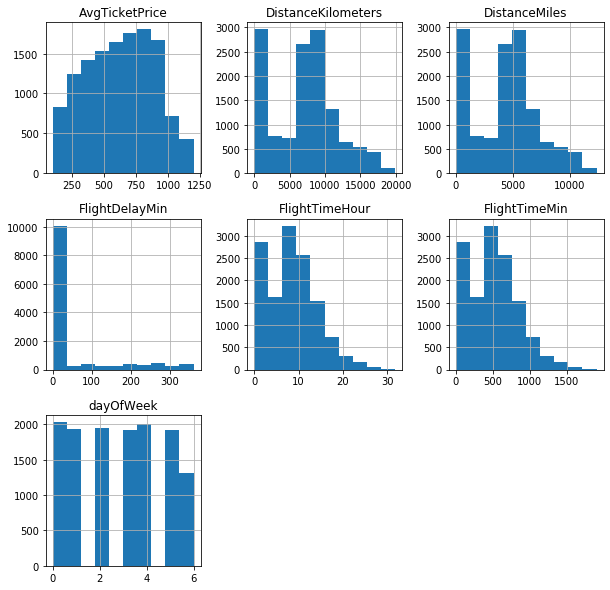

In [55]:
pd_flights.select_dtypes(include=np.number).hist(figsize=[10,10])
plt.show()

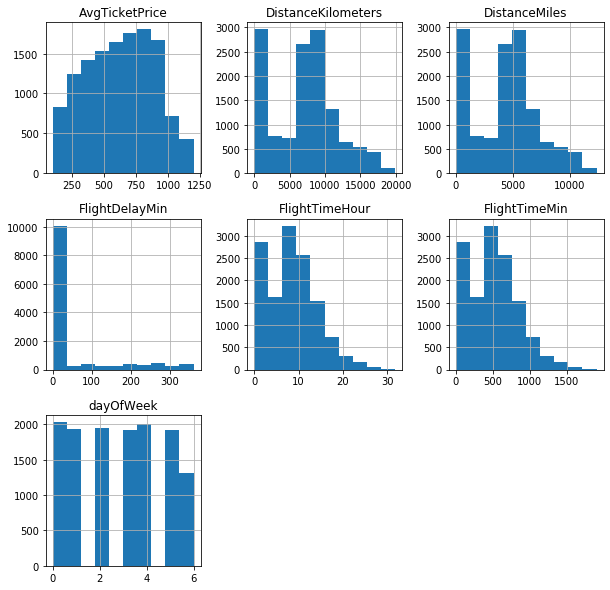

In [56]:
ed_flights.select_dtypes(include=np.number).hist(figsize=[10,10])
plt.show()

### Elasticsearch utilities

In [57]:
ed_flights2 = ed_flights[(ed_flights.OriginAirportID == 'AMS') & (ed_flights.FlightDelayMin > 60)]
ed_flights2 = ed_flights2[['timestamp', 'OriginAirportID', 'DestAirportID', 'FlightDelayMin']]
ed_flights2 = ed_flights2.tail()

In [58]:
print(ed_flights2.info_es())

index_pattern: flights
Index:
 index_field: _id
 is_source_field: False
Mappings:
 capabilities:
                   es_field_name  is_source es_dtype es_date_format        pd_dtype  is_searchable  is_aggregatable  is_scripted aggregatable_es_field_name
timestamp              timestamp       True     date           None  datetime64[ns]           True             True        False                  timestamp
OriginAirportID  OriginAirportID       True  keyword           None          object           True             True        False            OriginAirportID
DestAirportID      DestAirportID       True  keyword           None          object           True             True        False              DestAirportID
FlightDelayMin    FlightDelayMin       True  integer           None           int64           True             True        False             FlightDelayMin
Operations:
 tasks: [('boolean_filter': ('boolean_filter': {'bool': {'must': [{'term': {'OriginAirportID': 'AMS'}}, {'range